##신용연계채권(Credit Linked Note, CLN)
신용연계채권(Credit Linked Note, CLN)은 채무자가 디폴트(채무 불이행)할 경우 투자자에게 일정한 손실을 전가하는 방식으로, 신용 위험을 이전할 수 있는 금융 상품입니다. CLN은 일반적으로 고정된 이자 수익을 제공하며, 기초 자산의 신용 위험과 연계되어 있습니다.

In [3]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

디폴트 발생 없음
총 이자 지불: 250000.00 USD
총 손실 보상: 0.00 USD
총 지불 금액: 1250000.00 USD


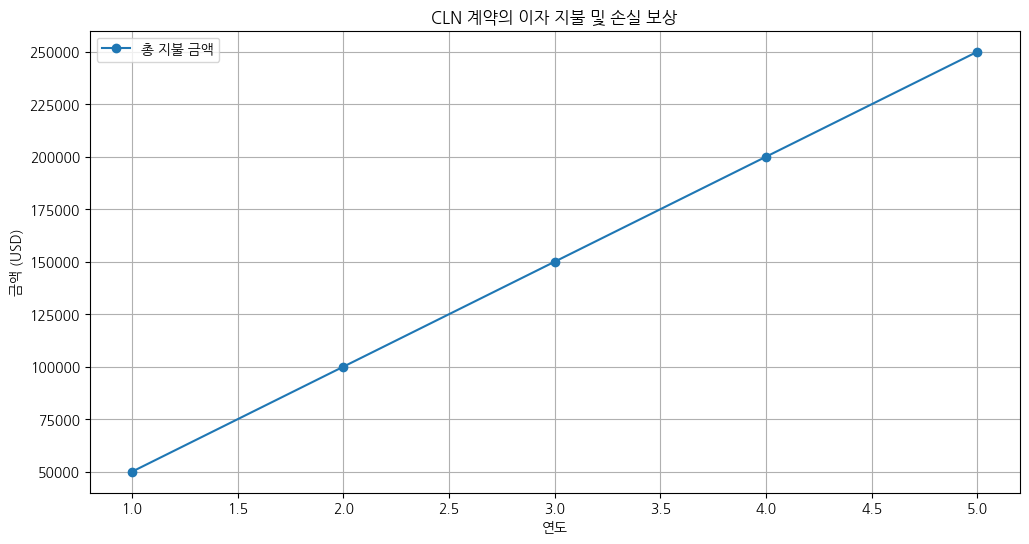

In [4]:
import numpy as np

# CLN 파라미터
notional = 1000000  # 명목 금액
coupon_rate = 0.05  # 연간 이자율 (5%)
default_probability = 0.03  # 연간 디폴트 확률 (3%)
recovery_rate = 0.4  # 회수율 (40%)
maturity = 5  # CLN 만기 (5년)

# 이자 지불 계산
coupon_payment = notional * coupon_rate
total_coupon_payments = coupon_payment * maturity

# 디폴트 발생 여부 시뮬레이션
np.random.seed(42)
default_occurs = np.random.rand(maturity) < default_probability

# 손실 및 보상 계산
if np.any(default_occurs):
    default_year = np.argmax(default_occurs) + 1
    loss = notional * (1 - recovery_rate)
    total_payments = total_coupon_payments + loss
    print(f"디폴트 발생 연도: {default_year}년")
else:
    total_payments = total_coupon_payments + notional
    print("디폴트 발생 없음")

print(f"총 이자 지불: {total_coupon_payments:.2f} USD")
print(f"총 손실 보상: {loss if np.any(default_occurs) else 0:.2f} USD")
print(f"총 지불 금액: {total_payments:.2f} USD")

# 시각화
import matplotlib.pyplot as plt

years = np.arange(1, maturity + 1)
coupon_payments = np.full(maturity, coupon_payment)
total_payments = np.cumsum(coupon_payments)

if np.any(default_occurs):
    total_payments[default_year - 1:] += loss

plt.figure(figsize=(12, 6))
plt.plot(years, total_payments, label='총 지불 금액', marker='o')
if np.any(default_occurs):
    plt.axvline(x=default_year, color='r', linestyle='--', label='디폴트 발생')
plt.xlabel('연도')
plt.ylabel('금액 (USD)')
plt.title('CLN 계약의 이자 지불 및 손실 보상')
plt.legend()
plt.grid(True)
plt.show()
